<a href="https://colab.research.google.com/github/IA2122/practica-7-paochoa/blob/main/practica7_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Práctica 7. Ejercicio Adicional 1: Contornos

Los _contornos_ son una herramienta muy útil en la visión por computador que sirven para resolver problemas complicados de manera sencilla. En muchas ocasiones se tiende a utilizar técnicas complejas de aprendizaje automático para resolver problemas de visión por computador cuando dichos problemas se podrían resolver utilizando técnicas de contornos. 

En este notebook vamos a utilizar los contornos para identificar las piezas del tres en raya, para identificar los bloques del tetris y para distinguir tornillos de tuercas en una imagen. Pero antes de eso vamos a ver cómo buscar y dibujar los contornos de una imagen. 

## Detectando y dibujando los contornos de una imagen

Comenzamos instalando y cargando las librerías necesarias.

In [1]:
!pip install imutils

In [2]:
import numpy as np
import cv2
import imutils
import matplotlib.pyplot as plt
import imutils
%matplotlib inline

Definimos nuestra función para mostrar imágenes dentro de los notebooks.

In [3]:
def mostrarImagen(image):
    if len(image.shape)==3:
        img2 = image[:,:,::-1]
        plt.imshow(img2)
        plt.show()
    else:
        img2 = image
        plt.imshow(img2,cmap='gray')
        plt.show()

A continuación descargamos un conjunto de imágenes.

In [4]:
!wget https://github.com/IA1819/Datasets/blob/master/im%C3%A1genes.zip?raw=true -O imagenes.zip
!unzip imagenes.zip

--2022-05-04 14:44:41--  https://github.com/IA1819/Datasets/blob/master/im%C3%A1genes.zip?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/IA1819/Datasets/raw/master/im%C3%A1genes.zip [following]
--2022-05-04 14:44:41--  https://github.com/IA1819/Datasets/raw/master/im%C3%A1genes.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/IA1819/Datasets/master/im%C3%A1genes.zip [following]
--2022-05-04 14:44:41--  https://raw.githubusercontent.com/IA1819/Datasets/master/im%C3%A1genes.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response.

Una de las imágenes descargadas contiene formas básicas. 

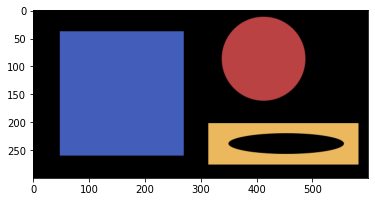

In [5]:
image = cv2.imread("imágenes/basic_shapes.png")
mostrarImagen(image)

Convertimos la imagen a escala de grises ya que la función de detección de contornos requiere una imagen de estas características.

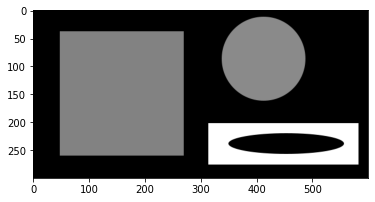

In [6]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
mostrarImagen(gray)

Buscamos los contornos de la imagen usando la función `findContours` que toma como parámetros una imagen (tendremos que clonar la imagen ya que la función `findContours` destruye dicha imagen), el parámetro `cv2.RETR_LIST` para obtener todos los contornos de la imagen, y el parámetro `cv2.CHAIN_APPROX_SIMPLE`. Una descripción de estos parámetros puede verse en la [documentación de OpenCV](https://docs.opencv.org/2.4/modules/imgproc/doc/structural_analysis_and_shape_descriptors.html?highlight=findcontours#findcontours).

In [7]:
cnts,_ = cv2.findContours(gray.copy(), cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)

In [8]:
cnts

[array([[[450, 220]],
 
        [[451, 219]],
 
        [[455, 219]],
 
        [[456, 220]],
 
        [[486, 220]],
 
        [[487, 221]],
 
        [[499, 221]],
 
        [[500, 222]],
 
        [[509, 222]],
 
        [[510, 223]],
 
        [[516, 223]],
 
        [[517, 224]],
 
        [[523, 224]],
 
        [[524, 225]],
 
        [[528, 225]],
 
        [[529, 226]],
 
        [[533, 226]],
 
        [[534, 227]],
 
        [[537, 227]],
 
        [[538, 228]],
 
        [[541, 228]],
 
        [[542, 229]],
 
        [[544, 229]],
 
        [[545, 230]],
 
        [[547, 230]],
 
        [[548, 231]],
 
        [[549, 231]],
 
        [[550, 232]],
 
        [[551, 232]],
 
        [[553, 234]],
 
        [[554, 234]],
 
        [[556, 236]],
 
        [[556, 240]],
 
        [[554, 242]],
 
        [[553, 242]],
 
        [[551, 244]],
 
        [[550, 244]],
 
        [[549, 245]],
 
        [[548, 245]],
 
        [[547, 246]],
 
        [[545, 246]],
 
        [[544, 2

In [9]:
seg = [[x[0][0],x[0][1]] for x in cnts[1]]
seg.append(seg[0])
seg

[[314, 202], [314, 275], [582, 275], [582, 202], [314, 202]]

La variable `cnts` contiene los contornos de la imagen, y podemos dibujar los contornos en una copia de la imagen original como se muestra a continuación.

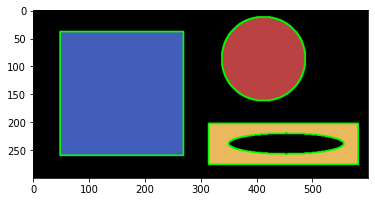

In [10]:
clone = image.copy()
cv2.drawContours(clone, cnts, -1, (0, 255, 0), 2)
mostrarImagen(clone)

También es posible mostrar los contornos de manera individual como se muestra a continuación.

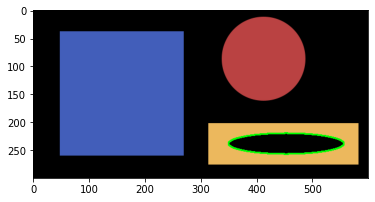

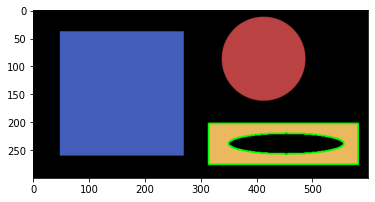

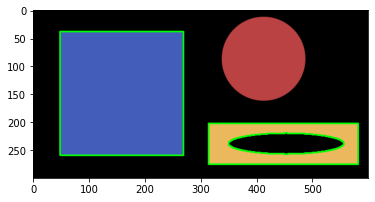

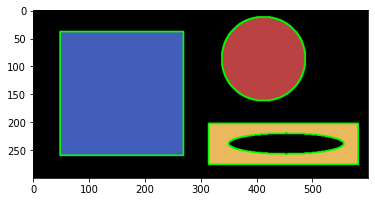

In [11]:
clone = image.copy()
for (i, c) in enumerate(cnts):
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
    mostrarImagen(clone)

## Propiedades sencillas de los contornos

Pasamos ahora a ver algunas propiedades sencillas de los contornos. En concreto, vamos a ver cómo, a partir de un contorno, podemos calcular:
1. El centro de masa.
2. El área.
3. El perímetro.
4. La caja contenedora.
5. El mínimo rectángulo contenedor.

Para este ejemplo vamos a utilizar la siguiente imagen.

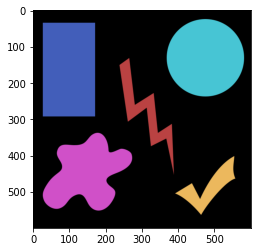

In [12]:
image = cv2.imread("imágenes/more_shapes.png")
mostrarImagen(image)

### El centro de masa

El centro de masa es la coordenada (x,y) del centro de un objeto en una imagen. Este centro se calcula utilizando los [momentos de una imagen](https://en.wikipedia.org/wiki/Image_moment). El centro de masa de un objeto se obtiene calculando la media de la posición de todas las coordenadas (x,y) en la forma del contorno. Veámos cómo se hace esto. 

Comenzamos convirtiendo la imagen a escala de grises y obteniendo sus contornos.

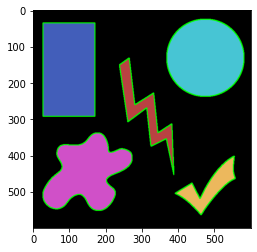

In [13]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
cnts,_ = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
clone = image.copy()
cv2.drawContours(clone, cnts, -1, (0, 255, 0), 2)
mostrarImagen(clone)

Iteramos sobre los contornos, calculamos sus momentos y a continuación calculamos el centro de masa. Por último mostramos dichos centros de masa sobre la imagen.

In [14]:
M = cv2.moments(cnts[0])
M

{'m00': 8049.5,
 'm01': 3922734.6666666665,
 'm02': 1921680020.4166665,
 'm03': 946168538770.3,
 'm10': 3903962.333333333,
 'm11': 1893790021.2916665,
 'm12': 923650256033.9166,
 'm20': 1907158065.0833333,
 'm21': 920845208946.35,
 'm30': 938201455016.0,
 'mu02': 10027462.48531127,
 'mu03': -90357278.99804688,
 'mu11': -8714281.12805581,
 'mu12': 139629153.52789116,
 'mu20': 13758238.996564865,
 'mu21': -110702121.8282404,
 'mu30': -104842695.58312988,
 'nu02': 0.1547580455829436,
 'nu03': -0.015543216002303874,
 'nu11': -0.13449116543829018,
 'nu12': 0.02401894033960202,
 'nu20': 0.21233668845835862,
 'nu21': -0.019042926154592285,
 'nu30': -0.01803499044883371}

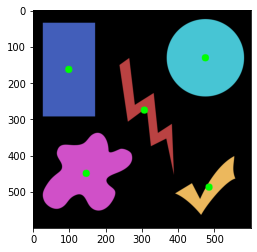

In [15]:
clone = image.copy()
for c in cnts:
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.circle(clone, (cX, cY), 10, (0, 255, 0), -1)
mostrarImagen(clone)

### Área y perimetro

El área de un contorno es el número de píxeles dentro de dicho contorno, y el perímetro es la longitud de dicho contorno. OpenCV proporciona las funciones `contourArea` y `arcLength` para calcular estos valores. 

Contorno #1 -- area: 8049.50, perimetro: 577.39
Contorno #2 -- area: 30873.00, perimetro: 893.32
Contorno #3 -- area: 10435.50, perimetro: 1038.54
Contorno #4 -- area: 36751.00, perimetro: 800.00
Contorno #5 -- area: 35702.00, perimetro: 705.07


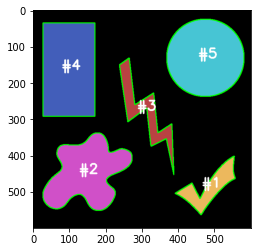

In [16]:
clone = image.copy()
for (i, c) in enumerate(cnts):
    area = cv2.contourArea(c)
    perimetro = cv2.arcLength(c, True)
    print("Contorno #{} -- area: {:.2f}, perimetro: {:.2f}".format(i + 1, area, perimetro))
 
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 2)
 
    # Dibujamos el identificador de cada contorno
    M = cv2.moments(c)
    cX = int(M["m10"] / M["m00"])
    cY = int(M["m01"] / M["m00"])
    cv2.putText(clone, "#{}".format(i + 1), (cX - 20, cY), cv2.FONT_HERSHEY_SIMPLEX, 1.25, (255, 255, 255), 4)
mostrarImagen(clone)

### Rectángulo contenedor

El rectángulo contenedor es exactamente eso, un recángulo que contiene el contorno entero de la imagen. Hay que tener en cuenta que estos rectángulos contenedores (o en inglés _bounding boxes_) no tienen en cuenta la rotación de los objetos. El rectángulo contenedor se calcula en OpenCV usando la función `boundingRect`.

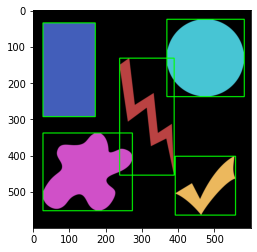

In [17]:
clone = image.copy()

for c in cnts:
    (x, y, w, h) = cv2.boundingRect(c)
    cv2.rectangle(clone, (x, y), (x + w, y + h), (0, 255, 0), 2)

mostrarImagen(clone)

### Mínimo rectángulo contenedor

Como acabamos de ver los rectángulos contenedores no tienen en cuenta la rotación de los objetos dentro de la imagen, para solucionar este problema hay que utilizar la función `minAreaRect` que calcula el rectángulo de menor área que contiene a un contorno. 

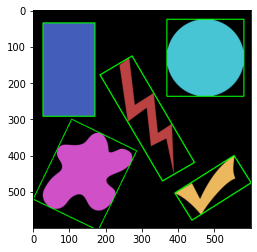

In [18]:
clone = image.copy()
for c in cnts:
    box = cv2.minAreaRect(c)
    box = np.int0(cv2.cv.BoxPoints(box) if imutils.is_cv2() else cv2.boxPoints(box))
    cv2.drawContours(clone, [box], -1, (0, 255, 0), 2)
mostrarImagen(clone)

## Propiedades avanzadas de los contonos

Pasamos ahora a ver algunas propiedades avanzadas de los contornos. En concreto utilizaremos las siguientes propiedades:
1. El _aspect ratio_ que indica la relación entre el ancho y el alto de un objeto (ancho/alto). 
2. El _extent_ que es el ratio entre el área del contorno y el área del rectángulo contenedor. 
3. El _convex hull_ es el menor conjunto convexo que contiene un contorno. 
<img src="https://raw.githubusercontent.com/IA1819/Datasets/master/contours_convex_hull.jpg">
4. La _solidity_ que es el ratio entre el área del contorno y el área del convex hull. 

Veámos cómo podemos utilizar estas propiedades para identificar objetos en una imagen.



## Identificando las piezas del tres en raya

Vamos a comenzar distinguiendo las X's y las O's de un tablero del juego de [tres en raya](https://es.wikipedia.org/wiki/Tres_en_l%C3%ADnea). En caso de que no estés familiarizado con este juego, el tablero del tres en raya es similar a la siguiente imagen. 

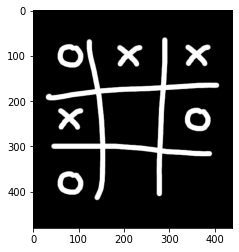

In [19]:
imageTresRaya = cv2.imread("imágenes/contours_tictactoe.png")
mostrarImagen(imageTresRaya)

Comenzamos detectando los contornos de la imagen.

In [20]:
gray = cv2.cvtColor(imageTresRaya, cv2.COLOR_BGR2GRAY)
cnts, _ = cv2.findContours(gray.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

Mostramos los contornos y el valor de solidity de cada uno de ellos.

Contorno #1 -- solidity=0.98


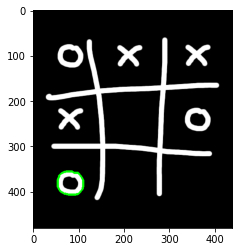

Contorno #2 -- solidity=0.60


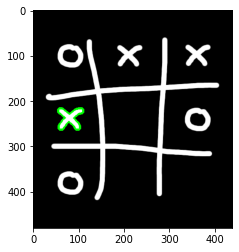

Contorno #3 -- solidity=0.98


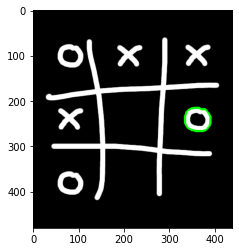

Contorno #4 -- solidity=0.60


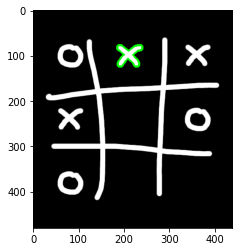

Contorno #5 -- solidity=0.60


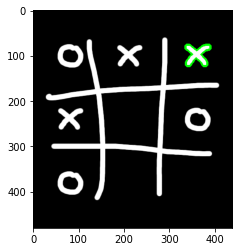

Contorno #6 -- solidity=0.98


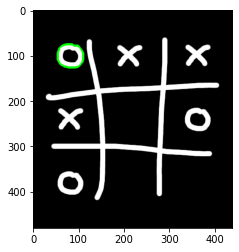

Contorno #7 -- solidity=0.28


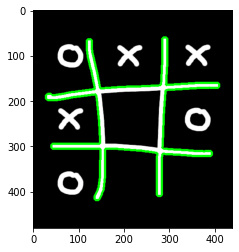

In [21]:
for (i, c) in enumerate(cnts):
    # Calculamos el área del contorno
    area = cv2.contourArea(c)
    # Calculamos el rectángulo contenedor
    (x, y, w, h) = cv2.boundingRect(c)
    # Calculamos el convex hull
    hull = cv2.convexHull(c)
    # Calculamos el área del convex hull
    hullArea = cv2.contourArea(hull)
    # Calculamos la solidity
    solidity = area / float(hullArea)
    print("Contorno #{} -- solidity={:.2f}".format(i + 1, solidity))
    clone = imageTresRaya.copy()
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 3)
    mostrarImagen(clone)

Como podemos ver en las anteriores imágenes, los 0's tienen un valor de solidity superior a 0.9, las X's tienen un valor superior a 0.5 pero inferior a 0.9, y otros objetos de la imagen (el tablero) tienen un valor de solidity menor. Por lo tanto podemos utilizar dicha información para identificar los distintos objetos del tablero.

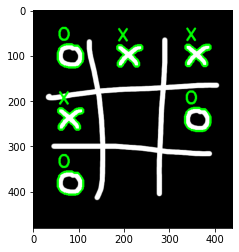

In [22]:
clone = imageTresRaya.copy()
for (i, c) in enumerate(cnts):
    # Calculamos el área del contorno
    area = cv2.contourArea(c)
    # Calculamos el rectángulo contenedor
    (x, y, w, h) = cv2.boundingRect(c)
    # Calculamos el convex hull
    hull = cv2.convexHull(c)
    # Calculamos el área del convex hull
    hullArea = cv2.contourArea(hull)
    # Calculamos la solidity
    solidity = area / float(hullArea)
    # Inicializamos el texto a mostrar
    char = "?"
    # Si la solidity es alta, entonces es un '0'
    if solidity>0.9:
        char = 'O'
    # sino si la solidity es razonablemente alta, entonces es una 'X'
    elif solidity >0.5:
        char = 'X'
    # Mostramos el caracter en caso de que no sea desconocido
    if char != '?':
        cv2.drawContours(clone, [c], -1, (0, 255, 0), 3)
        cv2.putText(clone, char, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.25,(0, 255, 0), 4)
mostrarImagen(clone)

## Identificando las piezas del tetris

En el ejemplo anterior solo hemos utilizado la solidity, pero en muchos ejemplos necesitaremos utilizar varias propiedades para distinguir distintos tipos de objetos. Vamos a ver un ejemplo de esto utilizando los bloques del tetris. En concreto usaremos la siguiente imagen.

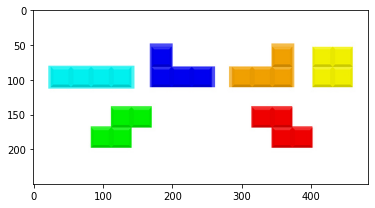

In [23]:
imageTetris = cv2.imread("imágenes/tetris_blocks.png")
mostrarImagen(imageTetris)

Al igual que antes comenzamos obteniendo los contornos de la imagen anterior y obteniendo distintas propiedades de los mismos. En esta ocasión tenemos que aplicar una binarización o umbralización (convertir la imagen de escala de grises a una imagen blanco-negro) para poder detectar los objetos de manera correcta. Esto lo llevamos a cabo utilizando la función `threshold`. A dicha función le pasamos como parámetros la imagen, el umbral $t$ tal que para todo pixel $p$ con valor superior a $t$, dicho pixel pasa a valer 1, y 0 en caso contrario.   

Contorno #1 -- solidity=0.81 -- area=3508.00 -- aspectRatio=1.48 -- extent=0.66 -- hullArea=4321.00


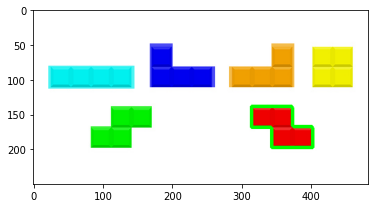

Contorno #2 -- solidity=0.80 -- area=3452.00 -- aspectRatio=1.47 -- extent=0.65 -- hullArea=4292.00


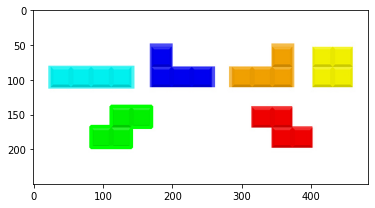

Contorno #3 -- solidity=1.00 -- area=3936.00 -- aspectRatio=3.76 -- extent=0.96 -- hullArea=3936.00


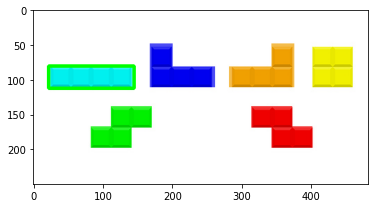

Contorno #4 -- solidity=1.00 -- area=3249.00 -- aspectRatio=1.00 -- extent=0.97 -- hullArea=3249.00


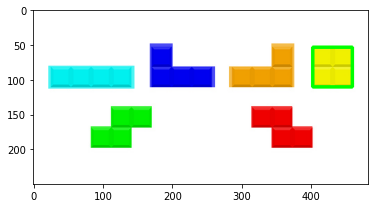

Contorno #5 -- solidity=0.79 -- area=3753.50 -- aspectRatio=1.49 -- extent=0.63 -- hullArea=4759.50


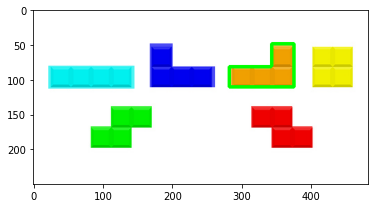

Contorno #6 -- solidity=0.79 -- area=3753.50 -- aspectRatio=1.49 -- extent=0.63 -- hullArea=4759.50


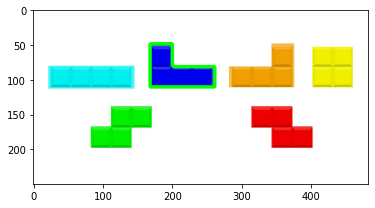

In [24]:
clone = imageTetris.copy()
gray = cv2.cvtColor(imageTetris, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
# OpenCV 3
cnts,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for (i, c) in enumerate(cnts):
    # Calculamos diversas propiedades
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)
    aspectRatio = w / float(h)
    extent = area / float(w * h)
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)
 
    # Visualizamos cada contorno y el convex hull asociado al mismo
    cv2.drawContours(clone, [c], -1, (240, 0, 159), 3)
    print("Contorno #{} -- solidity={:.2f} -- area={:.2f} -- aspectRatio={:.2f} -- extent={:.2f} -- hullArea={:.2f}".
          format(i + 1, solidity,area,aspectRatio,extent,hullArea))
    clone = imageTetris.copy()
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 3)
    mostrarImagen(clone)


Veámos algunas de las propiedades que nos permiten distinguir los objetos. 
- El cuadrado es el único objeto cuyo aspect ratio es 1 (o está muy cerca de 1).
- Si la anchura de la pieza es aproximadamente el triple que el alto, entonces tenemos un rectángulo. 
- Si el extend es menor que 0.65, entonces tenemos una pieza L.
- Si la solidity es lo suficientemente grande entonces tenemos una pieza Z.

Esto lo podemos utilizar para identificar cada una de las piezas. 

Contorno #1 -- solidity=0.81 -- area=3508.00 -- aspectRatio=1.48 -- extent=0.66 -- hullArea=4321.00
Contorno #2 -- solidity=0.80 -- area=3452.00 -- aspectRatio=1.47 -- extent=0.65 -- hullArea=4292.00
Contorno #3 -- solidity=1.00 -- area=3936.00 -- aspectRatio=3.76 -- extent=0.96 -- hullArea=3936.00
Contorno #4 -- solidity=1.00 -- area=3249.00 -- aspectRatio=1.00 -- extent=0.97 -- hullArea=3249.00
Contorno #5 -- solidity=0.79 -- area=3753.50 -- aspectRatio=1.49 -- extent=0.63 -- hullArea=4759.50
Contorno #6 -- solidity=0.79 -- area=3753.50 -- aspectRatio=1.49 -- extent=0.63 -- hullArea=4759.50


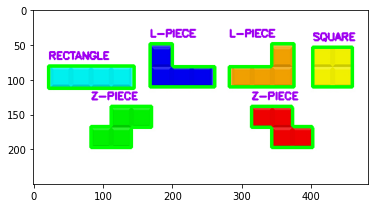

In [25]:
clone = imageTetris.copy()
gray = cv2.cvtColor(imageTetris, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 225, 255, cv2.THRESH_BINARY_INV)[1]
cnts,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for (i, c) in enumerate(cnts):
    # Calculamos diversas propiedades
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)
    aspectRatio = w / float(h)
    extent = area / float(w * h)
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)
 
    # Visualizamos cada contorno y el convex hull asociado al mismo
    cv2.drawContours(clone, [c], -1, (240, 0, 159), 3)
    print("Contorno #{} -- solidity={:.2f} -- area={:.2f} -- aspectRatio={:.2f} -- extent={:.2f} -- hullArea={:.2f}".
          format(i + 1, solidity,area,aspectRatio,extent,hullArea))
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 3)
    
    if aspectRatio >= 0.98 and aspectRatio <= 1.02:
        shape = "SQUARE"
 
    elif aspectRatio >= 3.0:
        shape = "RECTANGLE"
    
    elif extent < 0.65:
        shape = "L-PIECE"
 
    elif solidity > 0.80:
        shape = "Z-PIECE"
 
    cv2.putText(clone, shape, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5,(240, 0, 159), 2)
    
mostrarImagen(clone)

## Ejercicio

Utilizando las técnicas de contornos vistas en este notebook identifica los tornillos y tuercas de la siguiente imagen.

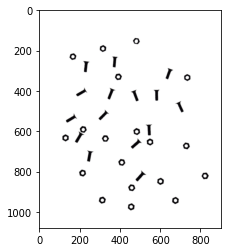

In [26]:
image = cv2.imread("imágenes/tornillos.png")
mostrarImagen(image)

El siguiente código proporciona la funcionalidad para detectar los contornos de la imagen, al igual que antes ha sido necesaria una umbralización. 

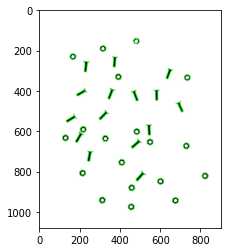

In [27]:
clone = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # esto se hace porque una imagen (jpg por ejemplo) siempre se te va a guardar con los 3 canalas
thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY_INV)[1]
cnts,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

cv2.drawContours(clone, cnts, -1, (0, 255, 0), 2)
mostrarImagen(clone)

Contorno #1 -- solidity=0.96 -- area=668.50 -- aspectRatio=0.94 -- extent=0.70 -- hullArea=695.50


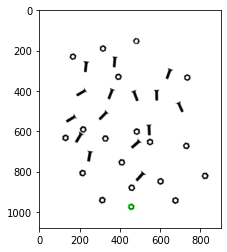

Contorno #2 -- solidity=0.96 -- area=671.00 -- aspectRatio=0.94 -- extent=0.70 -- hullArea=698.50


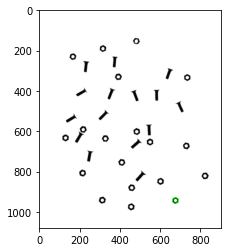

Contorno #3 -- solidity=0.97 -- area=683.00 -- aspectRatio=1.00 -- extent=0.67 -- hullArea=703.00


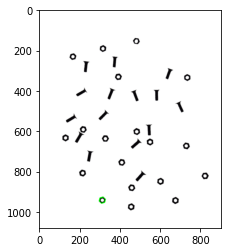

Contorno #4 -- solidity=0.96 -- area=665.00 -- aspectRatio=1.06 -- extent=0.65 -- hullArea=690.50


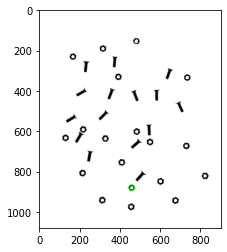

Contorno #5 -- solidity=0.96 -- area=665.50 -- aspectRatio=0.94 -- extent=0.69 -- hullArea=690.00


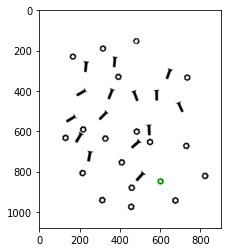

Contorno #6 -- solidity=0.97 -- area=664.50 -- aspectRatio=1.10 -- extent=0.67 -- hullArea=687.50


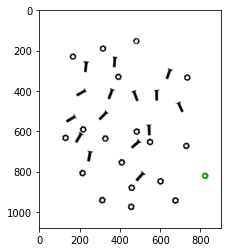

Contorno #7 -- solidity=0.67 -- area=551.00 -- aspectRatio=0.96 -- extent=0.25 -- hullArea=818.50


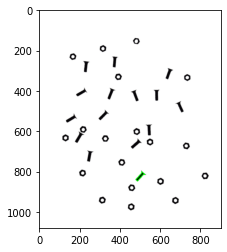

Contorno #8 -- solidity=0.96 -- area=665.00 -- aspectRatio=0.97 -- extent=0.67 -- hullArea=693.50


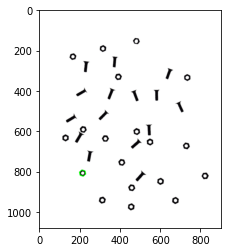

Contorno #9 -- solidity=0.96 -- area=656.00 -- aspectRatio=1.00 -- extent=0.68 -- hullArea=682.50


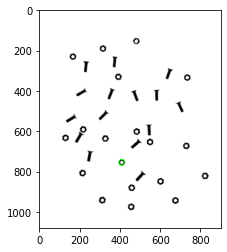

Contorno #10 -- solidity=0.70 -- area=522.50 -- aspectRatio=0.46 -- extent=0.42 -- hullArea=749.50


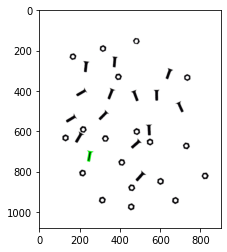

Contorno #11 -- solidity=0.96 -- area=646.00 -- aspectRatio=1.00 -- extent=0.67 -- hullArea=672.00


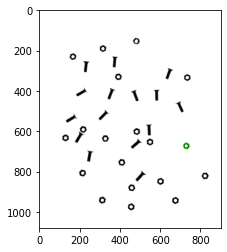

Contorno #12 -- solidity=0.74 -- area=532.50 -- aspectRatio=1.09 -- extent=0.26 -- hullArea=723.50


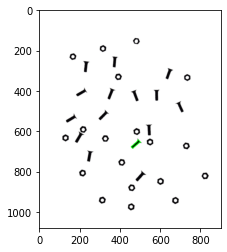

Contorno #13 -- solidity=0.96 -- area=652.00 -- aspectRatio=0.94 -- extent=0.68 -- hullArea=676.00


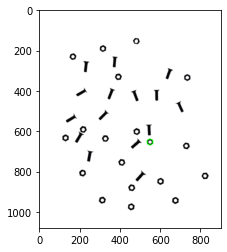

Contorno #14 -- solidity=0.97 -- area=649.50 -- aspectRatio=1.14 -- extent=0.68 -- hullArea=669.00


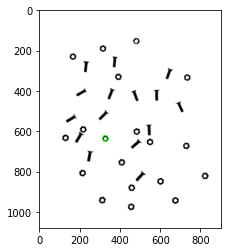

Contorno #15 -- solidity=0.97 -- area=651.50 -- aspectRatio=0.88 -- extent=0.68 -- hullArea=674.50


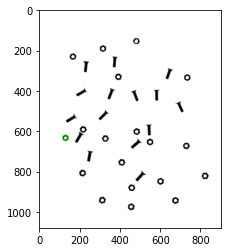

Contorno #16 -- solidity=0.72 -- area=540.50 -- aspectRatio=0.75 -- extent=0.28 -- hullArea=753.50


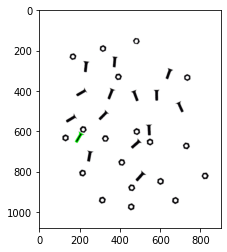

Contorno #17 -- solidity=0.96 -- area=651.50 -- aspectRatio=0.97 -- extent=0.66 -- hullArea=682.00


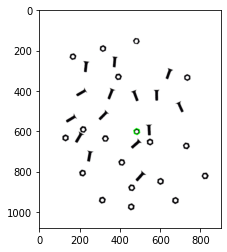

Contorno #18 -- solidity=0.96 -- area=651.00 -- aspectRatio=1.03 -- extent=0.66 -- hullArea=677.50


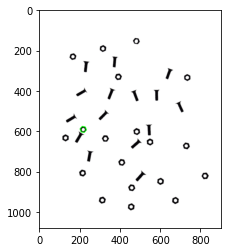

Contorno #19 -- solidity=0.78 -- area=523.00 -- aspectRatio=0.35 -- extent=0.57 -- hullArea=666.50


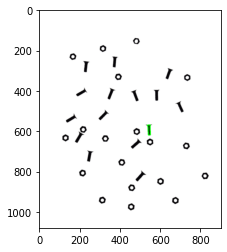

Contorno #20 -- solidity=0.75 -- area=496.00 -- aspectRatio=1.24 -- extent=0.28 -- hullArea=659.00


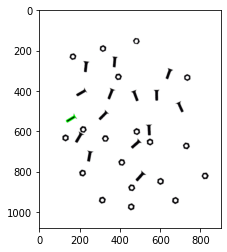

Contorno #21 -- solidity=0.77 -- area=501.50 -- aspectRatio=0.96 -- extent=0.26 -- hullArea=653.00


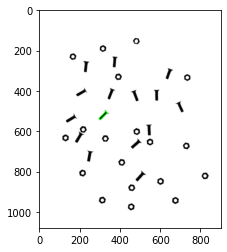

Contorno #22 -- solidity=0.74 -- area=467.50 -- aspectRatio=0.63 -- extent=0.29 -- hullArea=635.50


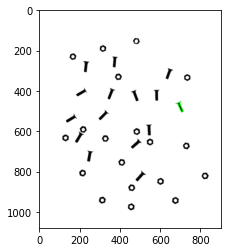

Contorno #23 -- solidity=0.71 -- area=517.00 -- aspectRatio=0.58 -- extent=0.31 -- hullArea=732.50


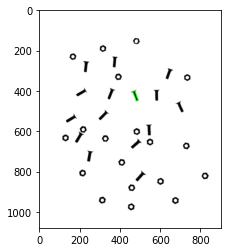

Contorno #24 -- solidity=0.79 -- area=509.00 -- aspectRatio=0.35 -- extent=0.55 -- hullArea=644.50


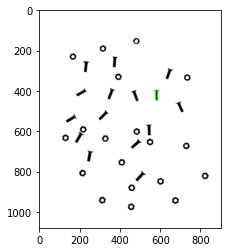

Contorno #25 -- solidity=0.78 -- area=464.00 -- aspectRatio=1.31 -- extent=0.27 -- hullArea=598.50


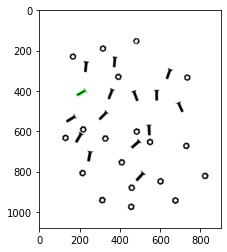

Contorno #26 -- solidity=0.72 -- area=510.50 -- aspectRatio=0.58 -- extent=0.31 -- hullArea=706.50


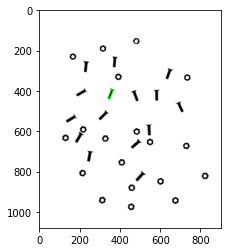

Contorno #27 -- solidity=0.96 -- area=621.00 -- aspectRatio=0.94 -- extent=0.69 -- hullArea=647.00


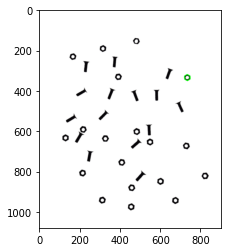

Contorno #28 -- solidity=0.96 -- area=637.00 -- aspectRatio=1.03 -- extent=0.68 -- hullArea=662.50


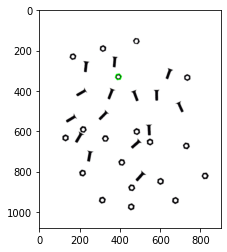

Contorno #29 -- solidity=0.67 -- area=514.00 -- aspectRatio=0.62 -- extent=0.31 -- hullArea=761.50


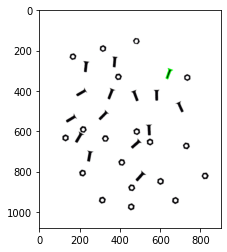

Contorno #30 -- solidity=0.65 -- area=538.50 -- aspectRatio=0.45 -- extent=0.42 -- hullArea=826.50


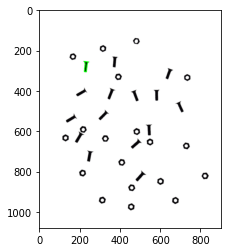

Contorno #31 -- solidity=0.75 -- area=508.50 -- aspectRatio=0.37 -- extent=0.52 -- hullArea=681.50


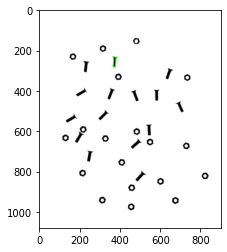

Contorno #32 -- solidity=0.97 -- area=622.00 -- aspectRatio=1.03 -- extent=0.67 -- hullArea=641.50


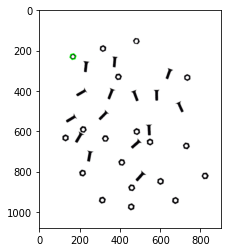

Contorno #33 -- solidity=0.97 -- area=624.00 -- aspectRatio=0.94 -- extent=0.69 -- hullArea=645.00


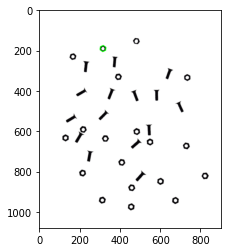

Contorno #34 -- solidity=0.95 -- area=569.00 -- aspectRatio=1.11 -- extent=0.66 -- hullArea=597.50


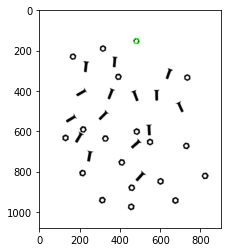

In [28]:
clone = image.copy()
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
thresh = cv2.threshold(gray, 30, 255, cv2.THRESH_BINARY_INV)[1]
cnts,_ = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for (i, c) in enumerate(cnts):
    # Calculamos diversas propiedades
    area = cv2.contourArea(c)
    (x, y, w, h) = cv2.boundingRect(c)
    aspectRatio = w / float(h)
    extent = area / float(w * h)
    hull = cv2.convexHull(c)
    hullArea = cv2.contourArea(hull)
    solidity = area / float(hullArea)
 
    # Visualizamos cada contorno y el convex hull asociado al mismo
    cv2.drawContours(clone, [c], -1, (240, 0, 159), 3)
    print("Contorno #{} -- solidity={:.2f} -- area={:.2f} -- aspectRatio={:.2f} -- extent={:.2f} -- hullArea={:.2f}".
          format(i + 1, solidity,area,aspectRatio,extent,hullArea))
    clone = image.copy()
    cv2.drawContours(clone, [c], -1, (0, 255, 0), 3)
    mostrarImagen(clone)


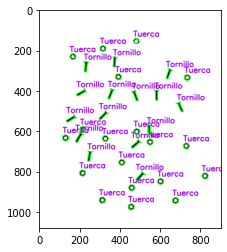

In [29]:
clone = image.copy()
for (i, c) in enumerate(cnts):
    # Calculamos el área del contorno
    area = cv2.contourArea(c)
    # Calculamos el rectángulo contenedor
    (x, y, w, h) = cv2.boundingRect(c)
    # Calculamos el convex hull
    hull = cv2.convexHull(c)
    # Calculamos el área del convex hull
    hullArea = cv2.contourArea(hull)
    # Calculamos la solidity
    solidity = area / float(hullArea)
    # Inicializamos el texto a mostrar
    char = "?"
    # Si la solidity es alta, entonces es un '0'
    if solidity>0.9:
        char = 'Tuerca'
    # sino si la solidity es razonablemente alta, entonces es una 'X'
    elif solidity <0.89:
        char = 'Tornillo'
    # Mostramos el caracter en caso de que no sea desconocido
    if char != '?':
        cv2.drawContours(clone, [c], -1, (0, 255, 0), 3)
        cv2.putText(clone, char, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1.25,(240, 0, 159), 4)
mostrarImagen(clone)